In [1]:
import torchvision
import torch
import numpy as np
import matplotlib.pyplot as plt
import quantus
from autoexplainer.explanations.custom import grad_cam
from autoexplainer.utils import torch_image_to_numpy_image, normalize_image

In [2]:
model = torch.load(f"../models/chosen_model_imagenette_pretrained_097.pth", map_location='cpu')

In [3]:
transform = torchvision.transforms.Compose(
        [
            torchvision.transforms.Resize((256, 256)),
            torchvision.transforms.ToTensor(),
            torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ]
    )

In [4]:
dataset = torchvision.datasets.ImageFolder("../data/imagenette/", transform=transform)

In [5]:
data_loader = torch.utils.data.DataLoader(dataset, batch_size=4)

In [6]:
x_batch, y_batch = next(iter(data_loader))

In [7]:
attr = grad_cam(model, x_batch.numpy(), y_batch.numpy())

In [8]:
attr.shape

(4, 1, 256, 256)

In [9]:
torch_image_to_numpy_image(x_batch[1])

array([[[ 0.24531215,  0.90546227,  0.2870589 ],
        [-0.31980482,  0.2577032 , -0.18352933],
        [-0.81642264, -0.42507   , -0.6192592 ],
        ...,
        [-1.5870366 , -1.4754901 , -1.3861438 ],
        [-1.5870366 , -1.4929972 , -1.403573  ],
        [-1.5870366 , -1.4929972 , -1.4384314 ]],

       [[-0.5253019 ,  0.10014006, -0.60182995],
        [-0.9362959 , -0.40756297, -0.88069713],
        [-1.1760426 , -0.792717  , -1.0375599 ],
        ...,
        [-1.5699118 , -1.457983  , -1.3687146 ],
        [-1.5185376 , -1.4229691 , -1.3512855 ],
        [-1.5527872 , -1.457983  , -1.403573  ]],

       [[-0.14855729,  0.48529422, -0.32296288],
        [-1.5014129 , -1.0203081 , -1.4210021 ],
        [-1.2274169 , -0.862745  , -1.229281  ],
        ...,
        [-1.5870366 , -1.4754901 , -1.3861438 ],
        [-1.5356624 , -1.4404761 , -1.3512855 ],
        [-1.5185376 , -1.4229691 , -1.3687146 ]],

       ...,

       [[-0.8335474 , -0.687675  , -0.68897593],
        [-0

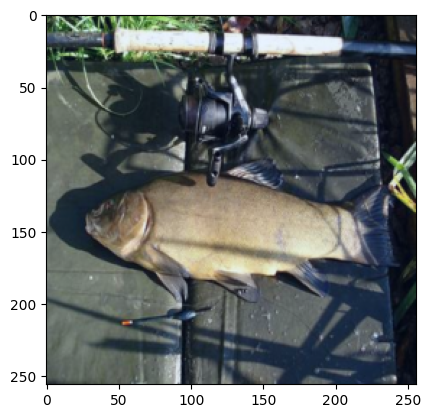

In [10]:
plt.imshow(normalize_image(torch_image_to_numpy_image(x_batch[1])))

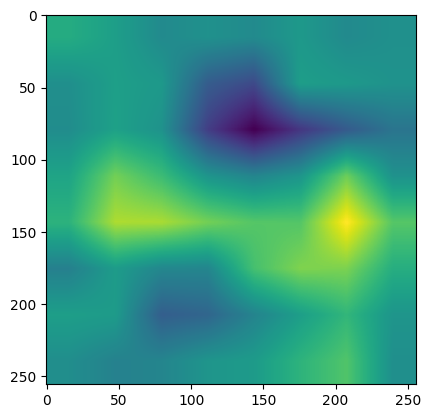

In [11]:
plt.imshow(attr[1][0])

In [8]:
metric = quantus.IterativeRemovalOfFeatures(
            **{
                "segmentation_method": "slic",
                "perturb_baseline": "mean",
                "perturb_func": quantus.baseline_replacement_by_indices,
                "return_aggregate": False,
            }
        )

Warnings and information:
 (1) The Iterative Removal Of Features metric is likely to be sensitive to the choice of baseline value 'perturb_baseline' and the method to segment the image 'segmentation_method' (including all its associated hyperparameters). 
 (2) If attributions are normalised or their absolute values are taken it may destroy or skew information in the explanation and as a result, affect the overall evaluation outcome.
 (3) Make sure to validate the choices for hyperparameters of the metric (by calling .get_params of the metric instance).
 (4) For further information, see original publication: Rieger, Laura, and Lars Kai Hansen. 'Irof: a low resource evaluation metric for explanation methods.' arXiv preprint arXiv:2003.08747 (2020).
 (5) To disable these warnings set 'disable_warnings' = True when initialising the metric.



In [9]:
result = metric(
        model=model,
        x_batch=x_batch.numpy(),
        y_batch=y_batch.numpy(),
        a_batch=None,
        explain_func=grad_cam,
    )

In [10]:
result

[1.1305225798043068,
 1.0639991541991023,
 1.0141069030736247,
 1.0209567723514965]